# EEE485 Statistical Learning and Data Analytics Project
    Data Analysis, Preprocessing and Feature Selection 
    Ayhan Okuyan
In this section, we will observe the dataset and decide how the data will be altered. First of all, we will observe the data to see if each class has the same amount of samples. If not, we will consider either removing the underrepresented class or we will consider downsampling the other classes. Then we will be observing the features to see if there are highly correlated features. We will consider for each feature, if we are going to use each of them and we will be looking at possible combinations of the data to see if we can extract some features that would give more information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SpotifyFeatures.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
classes = list(set(data['genre']))
print(classes)

['Dance', 'Comedy', 'Anime', 'Rap', 'Pop', 'Ska', 'Alternative', 'Country', 'Electronic', 'Reggaeton', 'Soul', 'A Capella', 'Hip-Hop', 'Opera', 'Movie', 'Soundtrack', "Children's Music", 'R&B', 'Indie', 'Children’s Music', 'Folk', 'Reggae', 'Classical', 'Blues', 'World', 'Rock', 'Jazz']


Here, we observe that some of the Children's Music are labeled with 'Children's Music' and some are labeled with "Children's Music" due to the shape of the apostrophe. When we examined the data, we have seen that there was a confusion since the 'Children’s Music' label was filled with heavy metal, alternative rock and classic rock song variants. Hence, we have decided to remove that segment of the data from the dataset

In [4]:
data = pd.read_csv('spotifyData_v2.csv')

In [6]:
classes = list(set(data['genre']))
print(classes)

['Dance', 'Comedy', 'Anime', 'Rap', 'Pop', 'Ska', 'Alternative', 'Country', 'Electronic', 'Reggaeton', 'Soul', 'A Capella', 'Hip-Hop', 'Opera', 'Movie', 'Soundtrack', "Children's Music", 'R&B', 'Indie', 'Folk', 'Reggae', 'Classical', 'Blues', 'World', 'Rock', 'Jazz']


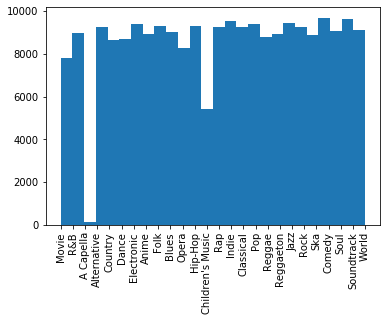

In [7]:
ax = plt.figure()
labels = data['genre'].values
ax = plt.hist(labels, bins=len(classes))
plt.xticks(rotation='vertical')
plt.show()

Here, we observe that there is an uneven distribution of the data with respect to their genre. While most of the classes are in range 800-10000, There is only a few 'Acapella', 'Movie' and 'Children's Music' instances. Since there is very little amount of these classes are represented in the data, we will completely remove the these instances from the dataset since the ratio of the other classes to 'A Capella' is 90/1 and to Children's Music is 2/1 ,which would be nearly impossible for the learning algorithm to learn. We will be also, doing this task in Excel. Furthermore this we have taken the initiative to remove the Movie class, as is it also underrepresented in the data and downsmapling to Movie would make us lose lots of information about the other classes.

In [8]:
data = pd.read_csv('spotifyData_v3.csv')

classes = list(set(data['genre']))
print(classes)

['Dance', 'Comedy', 'Anime', 'Rap', 'Pop', 'Ska', 'Alternative', 'Country', 'Electronic', 'Reggaeton', 'Soul', 'Hip-Hop', 'Opera', 'Soundtrack', 'R&B', 'Indie', 'Folk', 'Reggae', 'Classical', 'Blues', 'World', 'Rock', 'Jazz']


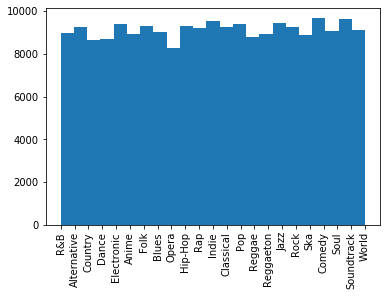

In [9]:
ax = plt.figure()
labels = data['genre'].values
ax = plt.hist(labels, bins=len(classes))
plt.xticks(rotation='vertical')
plt.show()

Now, we will be randomly selecting samples from each class according to the number of instances of the class with the minimum number of instances so that we have the same number of instances for each class, hence we further investigate the number of instances in each class. 

In [10]:
from collections import Counter
labels = data['genre'].values
print(len(labels))
Counter(labels)

210044


Counter({'R&B': 8992,
         'Alternative': 9263,
         'Country': 8664,
         'Dance': 8701,
         'Electronic': 9377,
         'Anime': 8936,
         'Folk': 9299,
         'Blues': 9023,
         'Opera': 8280,
         'Hip-Hop': 9295,
         'Rap': 9232,
         'Indie': 9543,
         'Classical': 9256,
         'Pop': 9386,
         'Reggae': 8771,
         'Reggaeton': 8927,
         'Jazz': 9441,
         'Rock': 9272,
         'Ska': 8874,
         'Comedy': 9681,
         'Soul': 9089,
         'Soundtrack': 9646,
         'World': 9096})

In [11]:
downsampleSize = 8280
'''dataDS = pd.DataFrame(columns=['genre','artist_name','track_name','track_id','popularity','acousticness','danceability',\
                               'duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness'\
                               'tempo','time_signature','valence'])'''
for i in range(len(classes)):
    part = data.loc[data['genre'] == classes[i]]
    #part = part.reset_index(drop=True)
    indexToRemove = np.random.permutation(len(part))[0:len(part)-downsampleSize]
    partDS = part.iloc[indexToRemove]
    data.drop(partDS.index, inplace=True)
data.reset_index(drop=True)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.08300,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
1,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.32300,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
2,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.06750,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
3,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.59600,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660
4,R&B,ELHAE,Needs,7KdRu0h7PQ0Ecfa37rUBzW,61,0.66100,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,4/4,0.2250
5,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,64,0.66700,0.670,239147,0.649,0.000130,C,0.1090,-7.426,Minor,0.0875,147.935,4/4,0.6180
6,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.3700
7,R&B,Layton Greene,Roll In Peace,33YFwLJbAdgePluIuEVa9p,60,0.72000,0.523,170343,0.507,0.000000,G,0.0774,-6.448,Minor,0.2250,140.368,4/4,0.7000
8,R&B,Usher,You Make Me Wanna...,47TqCCnEliDp8NRDyIQoQq,69,0.03590,0.761,219120,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.9220
9,R&B,Beyoncé,Flawless Remix,0zVMzJ37VQNFUNvdxxat2E,69,0.24100,0.639,234413,0.659,0.000008,G#,0.4840,-7.273,Major,0.2150,136.801,4/4,0.4570


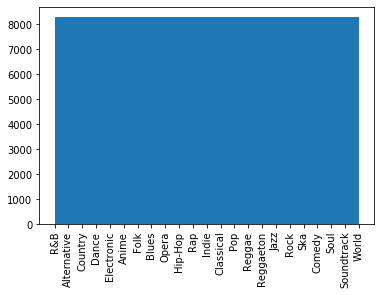

In [12]:
ax = plt.figure()
labels = data['genre'].values
ax = plt.hist(labels, bins=len(classes))
plt.xticks(rotation='vertical')
plt.show()

In [13]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
1,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
2,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
4,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660
5,R&B,ELHAE,Needs,7KdRu0h7PQ0Ecfa37rUBzW,61,0.6610,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,4/4,0.2250


Here, we conclude selecting classes and downsmapling for uniform distribution of classes. We now move onto manipulating and choosing the features. We first start by removing the columns that we will not be using further. We will run this phase separately for the different algorithms that we will be using since some require some features to be present in the alogirthm and some not.

The features to be removed for the kNN algorithm are given as,
- TrackID
- Track Name
- Time Signature

This is a distance measure based algorithm, however, we will be implementing an $alpha$-coefficient indicator function as a distance measure in the discrete data.
\begin{equation}
d\left(x_i,x_j\right)=\alpha I\left(x_i=x_j\right)
\end{equation}

The features that will be removed for the MLP algorithm are given as
- TrackID
- Artist Name
- Track Name
- Time Signature
- Key
- Mode

Features that will be removed for the Random Forest Algortihm are also given as 
- TrackID
- Track Name

Furthermore, choosing features is a part of the Decision Tree learning task and we will further continue while implementing the algorithm.


In [14]:
dataKNN = data.copy()
dataKNN.drop(['track_id','track_name','time_signature'], axis=1, inplace=True)
dataKNN.head()

,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,R&B,Mary J. Blige,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,0.6930
1,R&B,Rihanna,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,0.3230
2,R&B,Yung Bleu,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,0.0862
4,R&B,Olivia O'Brien,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,0.4660
5,R&B,ELHAE,61,0.6610,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,0.2250


In [15]:
dataMLP = data.copy()
dataMLP.drop(['track_id','track_name','artist_name','time_signature','key','mode'], axis=1, inplace=True)
dataMLP.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,R&B,65,0.0830,0.724,246333,0.689,0.000000,0.3040,-5.922,0.1350,146.496,0.6930
1,R&B,63,0.3230,0.685,186467,0.610,0.000000,0.1020,-5.221,0.0439,94.384,0.3230
2,R&B,62,0.0675,0.762,199520,0.520,0.000004,0.1140,-5.237,0.0959,75.047,0.0862
4,R&B,68,0.5960,0.653,213947,0.621,0.000000,0.0811,-5.721,0.0409,100.006,0.4660
5,R&B,61,0.6610,0.510,205640,0.331,0.000000,0.1230,-13.073,0.0895,124.657,0.2250


In [16]:
dataRF = data.copy()
dataRF.drop(['track_id','track_name'], axis=1, inplace=True)
dataRF.head()

,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,R&B,Mary J. Blige,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
1,R&B,Rihanna,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
2,R&B,Yung Bleu,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
4,R&B,Olivia O'Brien,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660
5,R&B,ELHAE,61,0.6610,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,4/4,0.2250


Now, we will be looking at the correlations between the feature spaces by using visualizations of each continuous and discrete pair of features withthe use of scatter plots.

In [18]:
col_num = 3
row_num = 4
for i in range(numFeatures):
    cnt = 0
    print(dataMLP.columns[i+1])
    for j in range(numFeatures-1,-1,-1):
        cnt += 1
        plt.subplot(row_num,col_num, cnt)
        plt.scatter(dataCont[:,i], dataCont[:,j], s=1, c=labels, cmap='jet')
        plt.ylabel(dataMLP.columns[j+1])
        plt.gca().axes.get_xaxis().set_visible(False)
    plt.show()

popularity


KeyboardInterrupt: 

### Data Normalization for MLP
In this part we normalize the features decided for MLP to fit in the range [0,1], so that the gradients don't wanish if sigmoid or tanh is used in the hidden layers. Furthermore, we will be turning the labels from string to index notation with the use of a created dictionary.

In [17]:
dataCont = np.asarray(dataMLP)

#create a dictionary for the integer labels
dictionary = {}
dictrev = {}
for i in range(len(classes)):
    dictionary[classes[i]] = i
    dictrev[i] = classes[i]
print(dictionary)
print(dictrev)

labels = [dictionary[smp] for smp in dataCont[:,0]]
dataCont = dataCont[:,1:]

numFeatures = dataCont.shape[1]                

{'Dance': 0, 'Comedy': 1, 'Anime': 2, 'Rap': 3, 'Pop': 4, 'Ska': 5, 'Alternative': 6, 'Country': 7, 'Electronic': 8, 'Reggaeton': 9, 'Soul': 10, 'Hip-Hop': 11, 'Opera': 12, 'Soundtrack': 13, 'R&B': 14, 'Indie': 15, 'Folk': 16, 'Reggae': 17, 'Classical': 18, 'Blues': 19, 'World': 20, 'Rock': 21, 'Jazz': 22}
{0: 'Dance', 1: 'Comedy', 2: 'Anime', 3: 'Rap', 4: 'Pop', 5: 'Ska', 6: 'Alternative', 7: 'Country', 8: 'Electronic', 9: 'Reggaeton', 10: 'Soul', 11: 'Hip-Hop', 12: 'Opera', 13: 'Soundtrack', 14: 'R&B', 15: 'Indie', 16: 'Folk', 17: 'Reggae', 18: 'Classical', 19: 'Blues', 20: 'World', 21: 'Rock', 22: 'Jazz'}


The data is mostly linarly independent in terms of features and there is usually no strıng correlation between the features. Hence, I will not be removing any feature from the data at this time of the project. Furthermore, since we are using MLP to predict classes, we need to normalize the input data according to each feature. When we investigate the features and their respective ranges are as follows. 
1. Popularity [0,100]
2. Acousticness [0,1]
3. Danceability [0,1]
4. Duration (ms) [15.4k,5.55m] in the dataset [15k, 5.6m] will be used since duraiton cannot be hold into firm limits.
5. Energy [0,1]
6. Instrumentalness [0,1]
7. Liveness [0,1]
8. Loudness [-60,0] (dB)
9. Speechiness [0,1]
10. Tempo (bpm) [30.4-243] in the dataset, [30,280] is generally adopted
11. Valence [0,1]

Hence, I will be normalizing the data according to these limits.

In [19]:
dataMLP = np.asarray(dataMLP)[:,1:].astype(float)
dataMLP[:,0] = dataMLP[:,0]/100.0
dataMLP[:,3] = (dataMLP[:,3]-15e3)/(5.6e6-15e3)
dataMLP[:,7] = (dataMLP[:,7]+60.0)/60.0
dataMLP[:,9] = (dataMLP[:,9]-30.0)/250.0

In [20]:
np.save('dataMLP.npy', dataMLP)
np.save('labelsMLP.npy', np.asarray(labels))

In [21]:
np.load('dataMLP.npy', allow_pickle=True)
np.load('labelsMLP.npy', allow_pickle=True)

array([[0.65    , 0.083   , 0.724   , ..., 0.135   , 0.465984, 0.693   ],
       [0.63    , 0.323   , 0.685   , ..., 0.0439  , 0.257536, 0.323   ],
       [0.62    , 0.0675  , 0.762   , ..., 0.0959  , 0.180188, 0.0862  ],
       ...,
       [0.47    , 0.901   , 0.517   , ..., 0.148   , 0.21654 , 0.813   ],
       [0.44    , 0.262   , 0.745   , ..., 0.146   , 0.280124, 0.489   ],
       [0.35    , 0.0973  , 0.758   , ..., 0.0287  , 0.335588, 0.479   ]])

In [22]:
np.load('labelsMLP.npy', allow_pickle=True)

array([14, 14, 14, ..., 10, 10, 10])

### Data Normalization for kNN 
Here, we will be dividing the feature space into two separate matrices for easy integration of the  two different distance metrics. we will be normalizing the continuous data in the [0,1] range. We have also decided not to use the time signature since nearly all of the instances are written with 4/4 time signature with a probability of 0.89.

In [23]:
dataKNN.head()

,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,R&B,Mary J. Blige,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,0.6930
1,R&B,Rihanna,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,0.3230
2,R&B,Yung Bleu,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,0.0862
4,R&B,Olivia O'Brien,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,0.4660
5,R&B,ELHAE,61,0.6610,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,0.2250


Since the continous labels that will be used in KNN is the same with the normalized features used in the MLP algorithm, we will simply use that data.

In [31]:
dataKNNdisc = dataKNN[['artist_name', 'key', 'mode']]
dataKNNdisc.head()
np.save('dataKNNdiscrete.npy', np.asarray(dataKNNdisc).astype(str))
np.save('labelsKNN.npy', labels)
np.save('dataKNNcont.npy', dataMLP)

(190440, 3)
